In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
import os
from tensorflow.keras.models import Sequential

In [65]:
df = pd.read_csv('datosLimpiosEscalados.csv')
print(df.head())

   Unnamed: 0       age  anaemia  creatinine_phosphokinase  diabetes  \
0           0  1.193302        0                  0.000166         0   
1           1 -0.490896        0                  7.514640         0   
2           2  0.351203        0                 -0.449939         0   
3           3 -0.911945        1                 -0.486071         0   
4           4  0.351203        1                 -0.435486         1   

   ejection_fraction  high_blood_pressure     platelets  serum_creatinine  \
0          -1.530560                    1  1.681651e-02          0.018291   
1          -0.007077                    0 -2.740240e-07          0.018291   
2          -1.530560                    0 -1.038073e+00          0.018291   
3          -1.530560                    0 -5.464741e-01          0.018291   
4          -1.530560                    0  6.517986e-01          0.929792   

   serum_sodium  sex  smoking  time  DEATH_EVENT  
0     -1.504036    1        0     4            1  
1 

In [66]:
#KMEANS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df_cluster = df.drop(columns=["Unnamed: 0","time","DEATH_EVENT"])

In [67]:
df_cluster

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.193302,0,0.000166,0,-1.530560,1,1.681651e-02,0.018291,-1.504036,1,0
1,-0.490896,0,7.514640,0,-0.007077,0,-2.740240e-07,0.018291,-0.141976,1,0
2,0.351203,0,-0.449939,0,-1.530560,0,-1.038073e+00,0.018291,-1.731046,1,1
3,-0.911945,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.018291,0.085034,1,0
4,0.351203,1,-0.435486,1,-1.530560,0,6.517986e-01,0.929792,-4.682176,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098573,0,-0.537688,1,-0.007077,1,-1.109765e+00,0.018291,1.447094,1,1
295,-0.490896,0,1.278215,0,-0.007077,0,6.802474e-02,0.018291,0.539054,0,0
296,-1.332995,0,1.525979,1,1.854958,0,4.902082e+00,-0.893210,0.312044,0,0
297,-1.332995,0,1.890398,0,-0.007077,0,-1.263389e+00,0.018291,0.766064,1,1


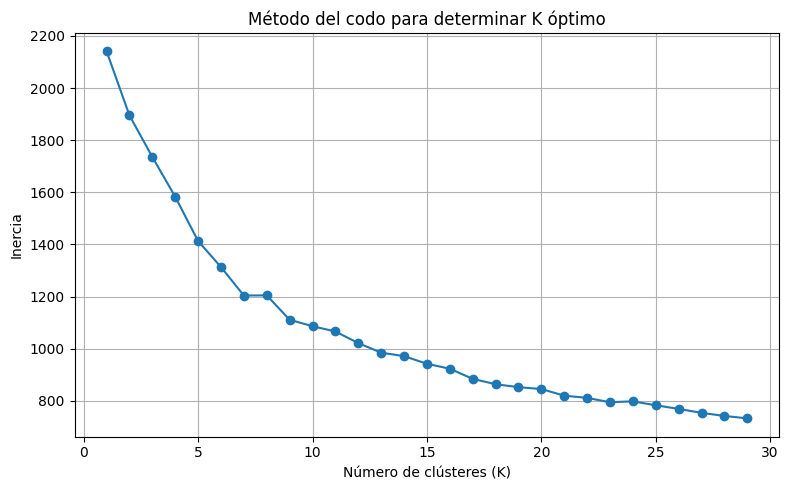

In [84]:
# 3. MÉTODO DEL CODO - ELECCIÓN DEL NÚMERO DE CLÚSTERES

# Evaluando la inercia
inercia = []
K_range = range(1, 30)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inercia.append(kmeans.inertia_)

# Graficar el resultado del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inercia, marker='o')
plt.title('Método del codo para determinar K óptimo')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.tight_layout()
plt.savefig("kmeans.png")
plt.show()

Fitting 10 folds for each of 30 candidates, totalling 300 fits
✅ Resultados del modelo de clasificación:
Accuracy:  0.6556
Precision: 0.6364
Recall:    0.3784
F1 Score:  0.4746
ROC AUC:   0.7772

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.66      0.85      0.74        53
           1       0.64      0.38      0.47        37

    accuracy                           0.66        90
   macro avg       0.65      0.61      0.61        90
weighted avg       0.65      0.66      0.63        90

Mejores hiperparámetros encontrados:
{'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 158}


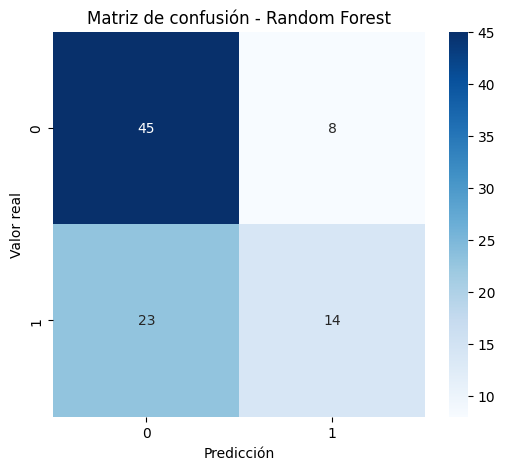

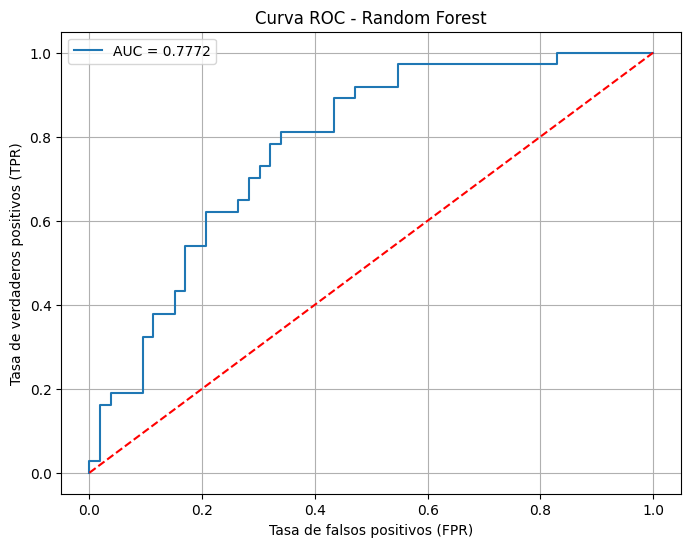

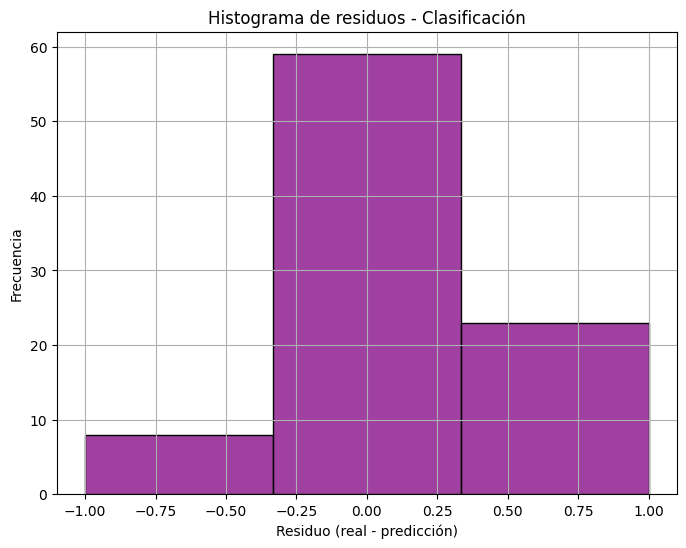

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
from scipy.stats import randint

# -------------------- DATOS --------------------
X = df[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction',
        'high_blood_pressure','platelets','serum_creatinine','serum_sodium',
        'sex','smoking']]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------- HIPERPARÁMETROS --------------------
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(5, 30),
    "min_samples_split": randint(2, 6),
    "min_samples_leaf": randint(1, 4),
    "max_features": ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1",
    cv=10,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# -------------------- ENTRENAMIENTO --------------------
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# -------------------- MÉTRICAS --------------------
print("✅ Resultados del modelo de clasificación:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# -------------------- GRÁFICOS --------------------

# 1. Matriz de confusión
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - Random Forest")
plt.show()

# 2. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.4f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

# 3. Histograma de residuos (para análisis de errores)
residuos = y_test.values - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=3, kde=False, color='purple', edgecolor='k')
plt.xlabel("Residuo (real - predicción)")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos - Clasificación")
plt.grid(True)
plt.show()


📊 Importancia de características (ordenadas):

              Característica  Importancia
4          ejection_fraction     0.231027
0                        age     0.150460
7           serum_creatinine     0.139164
2   creatinine_phosphokinase     0.137447
6                  platelets     0.121314
8               serum_sodium     0.108864
9                        sex     0.024518
3                   diabetes     0.023554
5        high_blood_pressure     0.023123
10                   smoking     0.020513
1                    anaemia     0.020015


/tmp/ipykernel_3830/3545333547.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias_df, x='Importancia', y='Característica', palette='viridis')


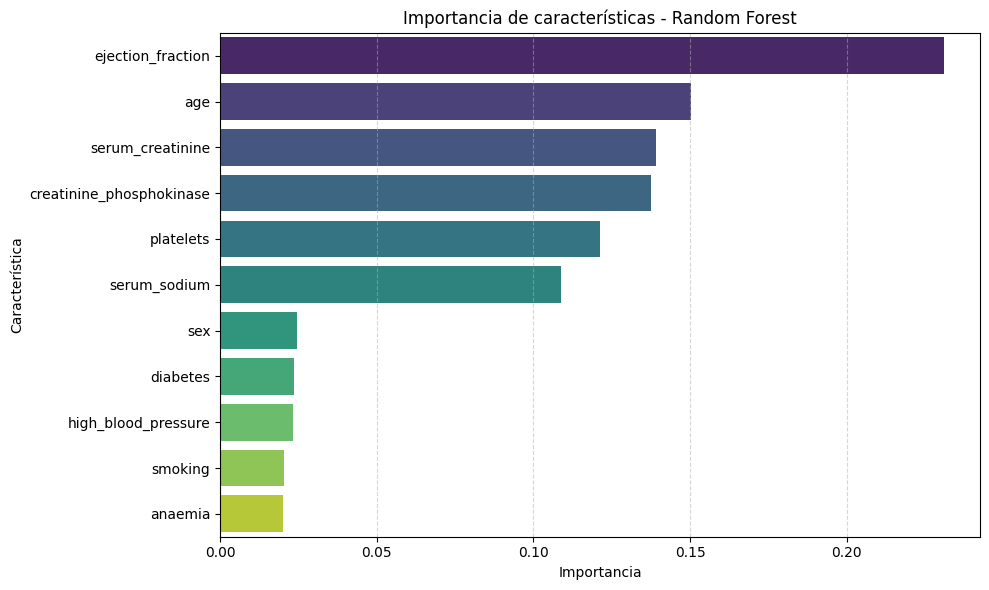

In [70]:
# Obtener nombres de las columnas
features = X.columns

# Obtener importancias del modelo entrenado
importancias = best_rf.feature_importances_

# Crear un DataFrame ordenado
importancias_df = pd.DataFrame({
    'Característica': features,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar en consola
print("📊 Importancia de características (ordenadas):\n")
print(importancias_df)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=importancias_df, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.savefig("importanciaDeCaracteristicasRM.png")
plt.show()

In [71]:
#RED NEURONAL CON TODAS LAS VARIABLES
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# 1. Definir modelo secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Salida binaria
])

# 2. Compilar modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. Early stopping para evitar overfitting
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 4. Entrenar modelo
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calcular pesos balanceados automáticos
pesos = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
pesos_dict = dict(zip(np.unique(y_train), pesos))
print("📊 Pesos de clase:", pesos_dict)

# Entrenar red neuronal con pesos de clase
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
  #  callbacks=[early_stop],
    class_weight=pesos_dict,  # <- AQUÍ está la diferencia
    verbose=1
)

📊 Pesos de clase: {0: 0.6966666666666667, 1: 1.771186440677966}
Epoch 1/100
11/11 [==============================] - 1s 11ms/step - loss: 1.2079 - accuracy: 0.4251 - val_loss: 0.7298 - val_accuracy: 0.4524
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 1.0595 - accuracy: 0.4970 - val_loss: 0.6879 - val_accuracy: 0.5952
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.9013 - accuracy: 0.5090 - val_loss: 0.6403 - val_accuracy: 0.7143
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8373 - accuracy: 0.5749 - val_loss: 0.6076 - val_accuracy: 0.7143
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.6228 - val_loss: 0.5755 - val_accuracy: 0.7619
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6467 - val_loss: 0.5525 - val_accuracy: 0.7857
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6712 - accurac

In [72]:
# Evaluación en test
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'✅ Precisión en test: {acc:.4f}')

# Predicciones binarias
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Reporte de métricas
print(classification_report(y_test, y_pred_labels))
print(f'ROC AUC: {roc_auc_score(y_test, y_pred):.4f}')


✅ Precisión en test: 0.6667
3/3 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        53
           1       0.63      0.46      0.53        37

    accuracy                           0.67        90
   macro avg       0.66      0.64      0.64        90
weighted avg       0.66      0.67      0.65        90

ROC AUC: 0.7517


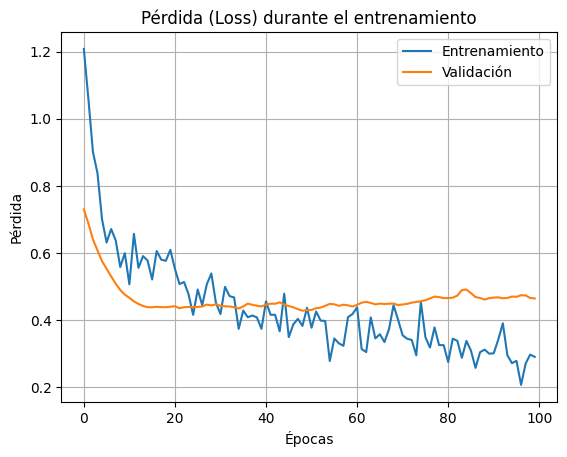

In [73]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (Loss) durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.savefig("perdidaEntrenamientoCompleto.png")
plt.show()

3/3 [==============================] - 0s 877us/step


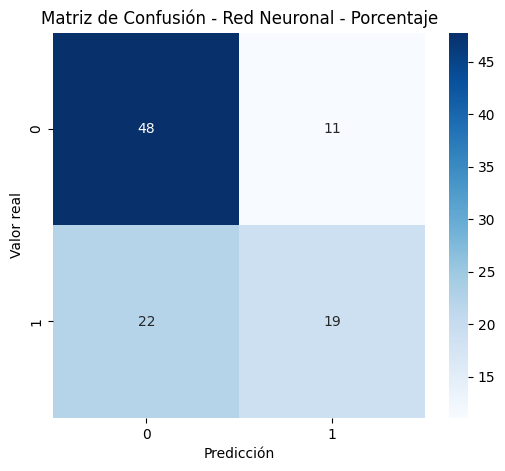

In [74]:
# Predicciones binarias
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Calcular matriz
cm = confusion_matrix(y_test, y_pred_labels)

# Convertir a porcentaje
cm_percent = cm / cm.sum() * 100

# Visualizar
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Red Neuronal - Porcentaje")
plt.grid(False)
plt.savefig("matrizCompleto.png")
plt.show()

In [75]:
model.save("modelo_completo.keras")

In [76]:
#RED NEURONAL CON LAS 5 VARIABLES MAS IMPORTANTES

# -------------------- DATOS --------------------
X = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Definir modelo secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Salida binaria
])

# 2. Compilar modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. Early stopping para evitar overfitting
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 4. Entrenar modelo
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calcular pesos balanceados automáticos
pesos = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
pesos_dict = dict(zip(np.unique(y_train), pesos))
print("📊 Pesos de clase:", pesos_dict)

# Entrenar red neuronal con pesos de clase
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
#    callbacks=[early_stop],
    class_weight=pesos_dict,  # <- AQUÍ está la diferencia
    verbose=1
)

📊 Pesos de clase: {0: 0.6966666666666667, 1: 1.771186440677966}
Epoch 1/100
11/11 [==============================] - 1s 11ms/step - loss: 0.7909 - accuracy: 0.5689 - val_loss: 0.6847 - val_accuracy: 0.5476
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6228 - val_loss: 0.6695 - val_accuracy: 0.5714
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6707 - val_loss: 0.6598 - val_accuracy: 0.5952
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6707 - val_loss: 0.6418 - val_accuracy: 0.6667
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.6826 - val_loss: 0.6301 - val_accuracy: 0.6905
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7201 - accuracy: 0.6587 - val_loss: 0.6121 - val_accuracy: 0.7381
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5527 - accurac

In [77]:
# Evaluación en test
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'✅ Precisión en test: {acc:.4f}')

# Predicciones binarias
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Reporte de métricas
print(classification_report(y_test, y_pred_labels))
print(f'ROC AUC: {roc_auc_score(y_test, y_pred):.4f}')

✅ Precisión en test: 0.7111
3/3 [==============================] - 0s 967us/step
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        53
           1       0.64      0.68      0.66        37

    accuracy                           0.71        90
   macro avg       0.70      0.71      0.70        90
weighted avg       0.71      0.71      0.71        90

ROC AUC: 0.7797


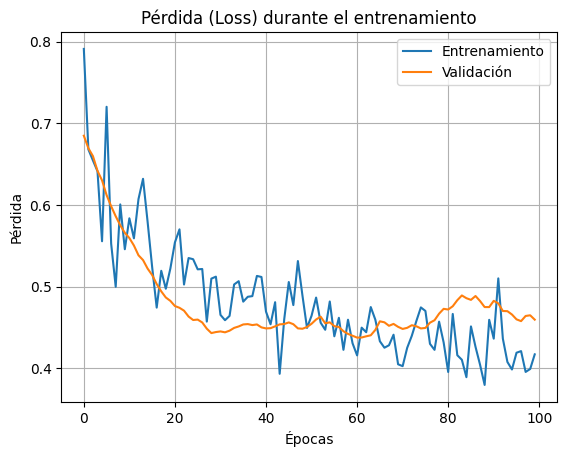

In [78]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (Loss) durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.savefig("perdida6Importantes.png")
plt.show()

3/3 [==============================] - 0s 945us/step


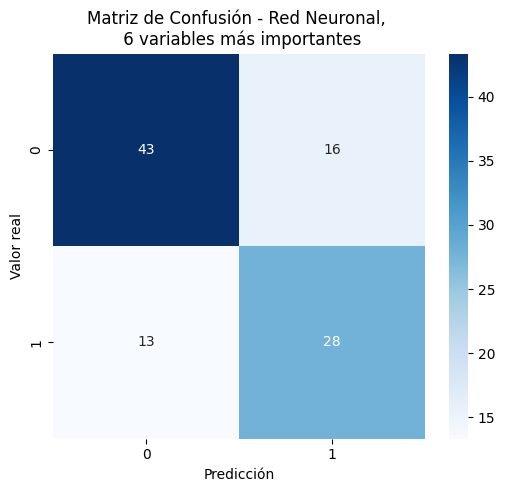

In [86]:
# Predicciones binarias
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Calcular matriz
cm = confusion_matrix(y_test, y_pred_labels)

# Convertir a porcentaje
cm_percent = cm / cm.sum() * 100

# Visualizar
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Red Neuronal, \n 6 variables más importantes")
plt.grid(False)
plt.savefig("matriz6masimportantes.png")
plt.show()

In [80]:
model.save("modelo_5_importantes.keras")

In [81]:
import pandas as pd
import joblib

# Nuevos datos
df_nuevo = pd.DataFrame({
    'age': [65],
    'creatinine_phosphokinase': [7861],
    'ejection_fraction': [38],
    'platelets': [265000],
    'serum_creatinine': [1.9],
    'serum_sodium': [130]
})

# Cargar el scaler entrenado
scaler = joblib.load('scaler.pkl')

# Columnas que fueron escaladas originalmente
columnas_a_escalar = [
    'age',
    'creatinine_phosphokinase',
    'ejection_fraction',
    'platelets',
    'serum_creatinine',
    'serum_sodium'
]

# Escalar
df_nuevo[columnas_a_escalar] = scaler.transform(df_nuevo[columnas_a_escalar])


In [82]:
df_nuevo

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,0.351203,7.51464,-0.007077,0.016817,0.838642,-1.504036


In [83]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/felipe/miniconda3/envs/myenv/lib/python3.11/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
